<a href="https://colab.research.google.com/github/yleessam/tf/blob/main/transfer/brain_classification_transfer_%EB%B0%B0%ED%8F%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 전이 학습을 통해 딥러닝의 성능 극대화하기

## 1. 소규모 데이터셋으로 만드는 강력한 학습 모델

### 이미지 증강 ImageDataGenerator

1. 데이터 증강은 기존의 훈련 데이터셋을 가지고 변형을 가하여 마치 새로운 데이터셋처럼 만들어내는 기법으로, 모델의 일반화 능력을 향상시키고 과적합(overfitting)을 방지

2. 회전, 크기 조절, 수평/수직 이동, 색상 변환, 플립(flip) 등 다양한 방식으로 이미지를 변형해서 신경망을 훈련시킬 때 배치 단위로 모델에 적용.


### 치매 환자의 뇌인지 일반인의 뇌인지 예측하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers

import numpy as np
import matplotlib.pyplot as plt


In [ ]:

# 깃허브에 준비된 데이터를 가져옵니다.
!git clone https://github.com/taehojo/data-ch20.git


Cloning into 'data-ch20'...
remote: Enumerating objects: 265, done.
remote: Counting objects: 100% (265/265), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 265 (delta 0), reused 265 (delta 0), pack-reused 0
Receiving objects: 100% (265/265), 1.86 MiB | 17.49 MiB/s, done.


## 학습을 위한 데이터셋을 늘려줍니다.

In [ ]:
# 학습셋의 변형을 설정하는 부분입니다.
train_datagen =


In [ ]:
#학습 데이터셋의 증
train_generator = train_datagen.flow_from_directory(
       './data-ch20/train',   # 학습셋이 있는 폴더의 위치입니다.

       )


Found 160 images belonging to 2 classes.


In [ ]:
# 테스트셋
test_datagen =

test_generator = test_datagen.flow_from_directory(
       './data-ch20/test',   # 테스트셋이 있는 폴더의 위치입니다.


       )


Found 120 images belonging to 2 classes.


In [ ]:
# 앞서 배운 CNN 모델을 만들어 적용해 보겠습니다.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                   

In [ ]:
# 모델 실행의 옵션을 설정합니다.
model.compile( )


In [ ]:
# 학습의 조기 중단을 설정합니다.
early_stopping_callback =


In [ ]:
# 모델을 실행합니다
history = model.fit(
        )

Epoch 1/100
32/32 [==============================] - 7s 189ms/step - loss: 0.6980 - accuracy: 0.5063 - val_loss: 0.6856 - val_accuracy: 0.7000
Epoch 2/100
32/32 [==============================] - 6s 175ms/step - loss: 0.6995 - accuracy: 0.4875 - val_loss: 0.6955 - val_accuracy: 0.4400
Epoch 3/100
32/32 [==============================] - 6s 175ms/step - loss: 0.6756 - accuracy: 0.6187 - val_loss: 0.6651 - val_accuracy: 0.6000
Epoch 4/100
32/32 [==============================] - 7s 212ms/step - loss: 0.6819 - accuracy: 0.5562 - val_loss: 0.6649 - val_accuracy: 0.5800
Epoch 5/100
32/32 [==============================] - 5s 167ms/step - loss: 0.6517 - accuracy: 0.6438 - val_loss: 0.5755 - val_accuracy: 0.7200
Epoch 6/100
32/32 [==============================] - 7s 211ms/step - loss: 0.5836 - accuracy: 0.7563 - val_loss: 0.5285 - val_accuracy: 0.8000
Epoch 7/100
32/32 [==============================] - 6s 180ms/step - loss: 0.5513 - accuracy: 0.7125 - val_loss: 0.4399 - val_accuracy: 0.8400

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

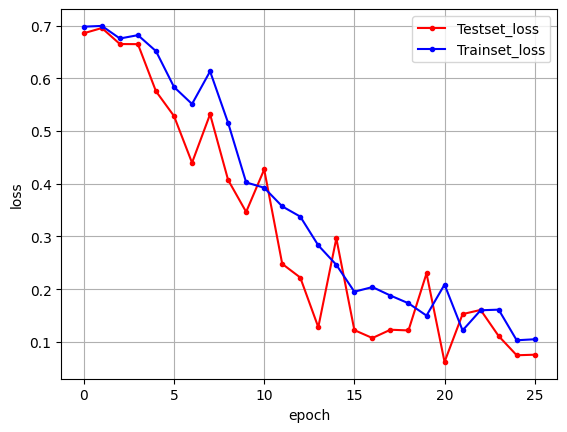

In [ ]:
# 그래프로 표현해 봅니다.
x_len =

plt.plot()
plt.plot()

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')

plt.grid()
plt.xlabel( )
plt.ylabel( )
plt.show()

## 2. 전이 학습으로 모델 성능 극대화하기

### 실습: 전이 학습 실습하기

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, models, layers, optimizers, metrics
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# 학습셋의 변형을 설정하는 부분입니다.
train_datagen =



In [ ]:
train_generator = train_datagen.flow_from_directory(
       './data-ch20/train',

       )


Found 160 images belonging to 2 classes.


In [ ]:

# 테스트셋의 정규화를 설정합니다.
test_datagen =

test_generator = test_datagen.flow_from_directory(
       './data-ch20/test',
        )

Found 120 images belonging to 2 classes.


In [ ]:
# VGG16 모델을 불러옵니다.
transfer_model =

In [ ]:
transfer_model.trainable = False
transfer_model.summary()

58889256/58889256 [==============================] - 2s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
# 모델을 설정합니다.
finetune_model = models.Sequential()



In [ ]:

finetune_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                524352    
                                                                 
 activation_5 (Activation)   (None, 64)                0         
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
 activation_6 (Activation)   (None, 1)                

In [ ]:
# 모델의 실행 옵션을 설정합니다.
finetune_model.compile( )


In [ ]:
# 학습의 조기 중단을 설정합니다.
early_stopping_callback =


In [ ]:
# 모델을 실행합니다.
history =

Epoch 1/20
32/32 [==============================] - 53s 2s/step - loss: 0.7155 - accuracy: 0.5813 - val_loss: 0.5897 - val_accuracy: 0.7200
Epoch 2/20
32/32 [==============================] - 61s 2s/step - loss: 0.5494 - accuracy: 0.7188 - val_loss: 0.5384 - val_accuracy: 0.7200
Epoch 3/20
32/32 [==============================] - 60s 2s/step - loss: 0.4469 - accuracy: 0.7937 - val_loss: 0.4477 - val_accuracy: 0.8600
Epoch 4/20
32/32 [==============================] - 52s 2s/step - loss: 0.4409 - accuracy: 0.8250 - val_loss: 0.4016 - val_accuracy: 0.8800
Epoch 5/20
32/32 [==============================] - 51s 2s/step - loss: 0.3496 - accuracy: 0.9125 - val_loss: 0.3190 - val_accuracy: 0.9600
Epoch 6/20
32/32 [==============================] - 60s 2s/step - loss: 0.3513 - accuracy: 0.8687 - val_loss: 0.2680 - val_accuracy: 0.9400
Epoch 7/20
32/32 [==============================] - 60s 2s/step - loss: 0.3080 - accuracy: 0.9000 - val_loss: 0.3491 - val_accuracy: 0.8800
Epoch 8/20
32/32 [==

In [ ]:
# 검증셋과 학습셋의 오차를 저장합니다.
y_vloss =
y_loss =


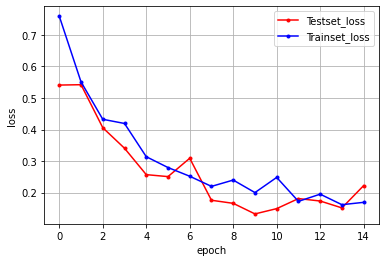

In [ ]:
# 그래프로 표현해 봅니다.
x_len =
plt.plot( )
plt.plot( )

# 그래프에 그리드를 주고 레이블을 표시하겠습니다.
plt.legend(loc='upper right')
plt.grid()
plt.xlabel( )
plt.ylabel( )
plt.show()